In [1]:
import sys  
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn

import tensorflow as tf
from tensorflow import keras

### Descargamos el dataset que vamos a utilizar

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### Seleccionamos del dataset lo que seran nuestras x e y

In [3]:
X = housing.data
y = housing.target

### Hacemos la division de los datos que tenemos, entre train y test

In [4]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

### Utilizamos el standar escaler para crear datos homogeneos

Acordarse de separa los datos de train y test, con el fit_transform y con el transform

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [6]:
np.random.seed(42)
tf.random.set_seed(42)

In [7]:
y_train

array([2.599  , 1.663  , 1.438  , ..., 5.00001, 3.297  , 0.678  ])

In [8]:
X_train.shape

(11610, 8)

## 3 Modos para crear las redes

Sacamos el modelo del keras.models de la siguiente forma

1.- Modo Secuencial

In [9]:
# Se le pasa una lista con las capas que queramos
model = keras.models.Sequential([
    # En el shape casisiempre se le pasan tuplas
    keras.layers.Input(shape=(8,)),
    # Aqui le indicamos la cantidad de neuronas
    keras.layers.Dense(30, activation="relu"),
    #Esta linea substituiria a las dos anteriores
    # keras.layers.Dense(30, activation="relu", input_shape=(8,)),
    # 
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.001))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

### 2.-Modo Funcional

Sirve para arquitecturas mas sofisticadas

In [ ]:
#Api funcional

# A cada capa se le va pasando la anterior
inputs = keras.Input((8,))
hidden1 = keras.layers.Dense(30, activation="relu")(inputs)
outputs = keras.layers.Dense(1)(hidden1)
model = keras.models.Model(inputs=[inputs], outputs=[outputs])

### 3.- Modelo de subclase

Recomienda hacerlo con pytorch que con keras, no es recomendable

In [ ]:
# Api subclase
class RegCalifornia(keras.models.Model):
    def __init__(self,shape=X_train.shape[1:], **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="relu")
        self.outputs = keras.layers.Dense(1)


    def call(self, inputs):
        h1 = self.hidden1(inputs)
        outputs = self.outputs(h1)
        return outputs

### Entrenamiento de la red

Le pasamos los datos para el entrenamiento, el numero de vueltas que le va a dar y los datos de validacion

In [17]:
# Despues de cada epoch, guardamos el modelo, solo la mejor version. Sirve para evitar fallas de si se va la luz o lo que sea
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras",save_best_only=True)
# Usamos una funcion para que el modelo pare mediante una funcion
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
# Entrenamiento del modelo
history = model.fit(X_train,y_train,epochs=10000,callbacks=[checkpoint_cb,early_stopping_cb],validation_data=(X_val,y_val))

Epoch 1/10000


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3949 - val_loss: 0.4055
Epoch 2/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3942 - val_loss: 0.4047
Epoch 3/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 0.3934 - val_loss: 0.4039
Epoch 4/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3926 - val_loss: 0.4031
Epoch 5/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.3919 - val_loss: 0.4024
Epoch 6/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.3912 - val_loss: 0.4017
Epoch 7/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3904 - val_loss: 0.4009
Epoch 8/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3897 - val_loss: 0.4003
Epoch 9/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.3891 - val_loss: 0.3996
Epoch 10/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.3884 - val_loss: 0.3989
Epoch 11/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.3877 - val_loss: 0.3983
Epoch 12/10000
363/3

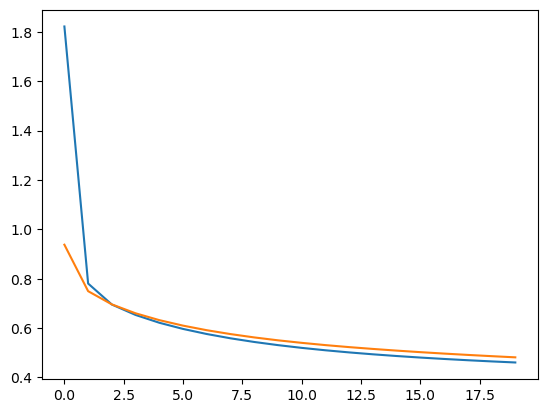

In [11]:
plt.plot(pd.DataFrame(history.history))

In [12]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 0.4888


0.46708470582962036

In [13]:
X_nueva = X_test[:3]
y_nueva = model.predict(X_nueva)
y_nueva

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[1.9390128],
       [2.6286027],
       [1.6396475]], dtype=float32)

### Guardar el modelo

Usar las extensiones .h5 o .keras, aunque .h5 está siendo deprecado

In [14]:
model.save("modelito.keras")
# Cargar
# model = keras.models.load_model("modelito.h5")